## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 11
---------------------------------------

GOALS:

1. Understand Causal vs Experimental Studies
2. Do a more free form data analysis
3. Start doing your ethics reading

----------------------------------------------------------

This homework has **2 questions**, **10 exercises** and **1 essay response**.

In [213]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [214]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know
country,,,,,
GB,833,604,49,33,114
US,507,493,120,80,133


In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?  


In [216]:
DF.loc['total'] = DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)

DF
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


In [217]:
all_respondents = DF['total'].loc['total']
human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['total']
human_responsible/all_respondents

0.45178691840863117

Approximately 45% of the population thinks that climate change is caused by human actions

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

In [220]:
gb_respondants = DF['total'].loc['GB']
GB_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['GB']
GB_human_responsible/gb_respondants

0.5101041028781383

51% of the people who responded that they are from Great Britain believe that climate change is human-caused.

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  


In [223]:
us_respondants = DF['total'].loc['US']
US_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['US']
US_human_responsible/us_respondants

0.3803450862715679

When looking at US respondents, we find that 38%—which is lower than in Great Britain—think that climate change is occurring and that human activity is primarily to blame.

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. If a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

If a person is from GB, then there is a 51% probability that they believe climate change is caused by human activity. If a person answered that climate change is not caused mainly for human activities then they are more likely to be from US.


"Among all respondents, 45% believe that climate change is primarily caused by human activity. However, when we narrow the focus to respondents from Great Britain, that figure rises to 51%, indicating that more than half attribute climate change to human responsibility. In contrast, only 38% of respondents from the United States think that human activity is the primary cause of climate chang."

## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [228]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
show(DF)

In [229]:
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [230]:
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [233]:
# Your code here
DF_dept = DF_melt.pivot(index='MF',columns='Department',values='Number')
DF_dept

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

In [235]:
# Your code here
DF_dept['D']['Female Yes']

131

In [236]:
DF_dept['D'].loc['Female Yes']

131

These two codes bellow let us do the same thing, which is calculate the probability that a female student is admitted for department D.

In [238]:
prob_female = DF_dept['D']['Female Yes']/(DF_dept['D']['Female Yes']+DF_dept['D']['Female No'])
prob_male = DF_dept['D']['Male Yes']/(DF_dept['D']['Male Yes']+DF_dept['D']['Male No'])
prob_female

0.34933333333333333

In [239]:
prob_male

0.33093525179856115

### Here is a plot of the proportions data

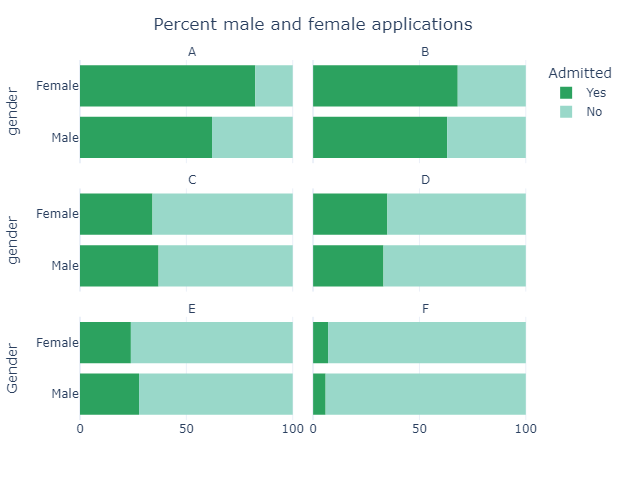

In [241]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [243]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

#### 1. Describe what you see in the data set (variables, observations, etc)

In [246]:
DF.shape

(620, 14)

In [247]:
DF.columns

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity'],
      dtype='object')

In [248]:
DF.dtypes

first_name       object
last_name        object
age               int64
phone_number     object
set_id            int64
number           object
theme            object
subtheme         object
year              int64
name             object
pieces          float64
us_price        float64
image_url        object
quantity          int64
dtype: object

This data has 14 columns and 620 variables, most of the data is 'object' which means is categorical, the the rest of our data is numerical because it is 'int64' or 'float64'.

#### 2. What are the three most common first names of purchasers?

In [251]:
counts = DF['first_name'].value_counts()
show(counts)

The 3 most common names are:
1. Jackson =13
2. Joseph =11
3. Jacob  =11

After I used "value_counts", it got me the total number of the names, so then I can know how many times it is repeating and know what are the most common names on the data.

#### 3. What are the three most common themes of Lego sets purchased?

In [254]:
counts = DF['theme'].value_counts()
show(counts)

The 3 most common themes are:
1. Star wars
2. Nexo Knights
3. Gear

Since the question number 2 is similar to this one, I used "value_counts" as well to see how many times the themes are repeated.

#### 4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

In [257]:
columns =DF[(DF['theme'] == 'Star Wars') | (DF['theme'] == 'Nexo Knights') | (DF['theme'] == 'Gear')]
sub_theme = columns['subtheme'].value_counts()
show(sub_theme)

The most common subtheme among all the most common themes is 'ultimate'.

#### 5. Create data frames for each of the ages in the following categories:"18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT- use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

In [368]:
#DF['age_under_18']=DF[(DF['age'] >= 18)]
#show(DF)
age_19_25 = DF[(DF['age'] >= 19) & (DF['age'] <=25)]
age_26_35 =DF[(DF['age'] >= 26) & (DF['age'] <=35)]
age_36_50 =DF[(DF['age'] >=36) & (DF['age'] <=50)]
age_over_51 =DF[(DF['age'] >= 51)]

When I try to add a new column as in the first comment in the code above, I get an error that says “Cannot set a DataFrame with multiple columns to the single column age_under_18”, which confuses me, I tried for a long time but I just could not create each column.
As far as I know in order to create a mask I must have an existing column, but it won't let me create it, so that's why I didn't use masks.
I could not find the way to create the new columns for each age group.

#### 6. Which age group has purchased the highest number of Lego sets.

In [334]:
age_under_18 =DF[(DF['age'] >= 18)]
most_lego_set_bought = age_under_18.describe()
#this group purchased 603 lego sets
age_19_25 = DF[(DF['age'] >= 19) & (DF['age'] <=25)]
most_lego_set_bought = age_19_25.describe()
#this group purchased 129 lego sets
age_26_35 =DF[(DF['age'] >= 26) & (DF['age'] <=35)]
most_lego_set_bought = age_26_35.describe()
#this group purchased 183 lego sets
age_36_50 =DF[(DF['age'] >=36) & (DF['age'] <=50)]
most_lego_set_bought = age_36_50.describe()
#this group purchased 216 lego sets
age_over_51 =DF[(DF['age'] >= 51)]
most_lego_set_bought = age_over_51.describe()
#this group purchased 62 lego sets

The group that bought the most lego sets was 18 and under with 603 lego sets purchased.
I didn't put the code of what each one showed me because it would take up too much space and I think it would make it confusing, so I added small comments in each code for each age group.

#### 7. Which age group has spent the most money on Legos?

In [281]:
theme_profit = DF.groupby('age')['total_spend'].sum()
theme_profit_sorted = theme_profit.sort_values(ascending=False)
show(theme_profit_sorted)

The age group that has spent the most on lego sets is **26**, which spent a total of 1403.6.

#### 8. Which Lego theme has made the most money for Lego?

In [285]:
theme_profit = DF.groupby('theme')['total_spend'].sum()
theme_profit_sorted = theme_profit.sort_values(ascending=False)
show(theme_profit_sorted)

Star Wars is lego's biggest money maker, with a total of 4447.83.

#### 9. Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

In [277]:
DF['area_code'] = DF['phone_number'].str[:3]
area_code_spending =DF.groupby('area_code')['total_spend'].sum()
area_code_spending_sorted =area_code_spending.sort_values(ascending=False)
show(area_code_spending_sorted)

At the beginning I could not make it show only the first 3 digits of the area code, but after several attempts I was able to make it show only the digits I needed.

The area code that I spend the most money on legos is 956, which spent 719.96

#### 10. Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

How does a histogram looks if we focus on the total spend of the first name column?
And, how would it look if we color bt the theme of lego?

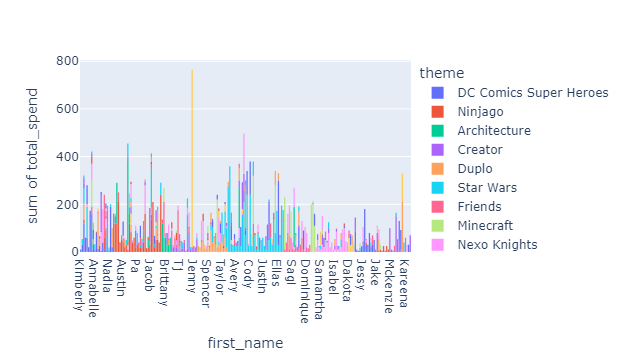

In [308]:
fig = px.histogram(DF,
                   x='first_name',
                   y='total_spend',
                   color='theme')
fig.show()

In [310]:
DF.columns

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity', 'total_spend', 'area_code'],
      dtype='object')

## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....

## UNMASKING AI- MY MISSION TO PROTECT WHAT IS HUMAN IN A WORD OF MACHINES

#### WRITTEN BY: JOY BUOLAMWINI

As I read the introduction, the author is highlighting a problem she had with a project she did when she was a college student. Her project had to read her face, but being a brunette, she did not recognize any face, so she put on a white mask that she wore at a Halloween party to see if she could recognize her face, and yes, the artificial intelligence did recognize her face, which left her wondering how an AI could fail.